In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df = pd.read_csv("sales_data.csv")

In [2]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 7 columns):
 #   Column           Non-Null Count    Dtype         
---  ------           --------------    -----         
 0   TransactionID    1000000 non-null  object        
 1   Date             1000000 non-null  datetime64[ns]
 2   ProductCategory  1000000 non-null  object        
 3   Location         1000000 non-null  object        
 4   QuantitySold     1000000 non-null  int64         
 5   PricePerUnit     1000000 non-null  float64       
 6   TotalSales       1000000 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 53.4+ MB


In [3]:
df.head(10)

,TransactionID,Date,ProductCategory,Location,QuantitySold,PricePerUnit,TotalSales
0,343659ce-f3f9-4602-8300-ef6dd037018e,2025-01-01,Ropa,Cartagena,3,52.54,157.62
1,32321226-2d3c-4d4a-8d13-5767ba9fc659,2025-01-01,Ropa,Bogotá,2,48.18,96.36
2,75e25cc7-a4d8-429f-88e4-80fab90f7d9d,2025-01-01,Calzado,Cali,-4,67.35,-269.40
3,6facb6e4-a844-403c-a74e-cca6b6b4d44b,2025-01-01,Accesorios,Cartagena,6,53.00,318.00
4,0bf768e5-580f-43a1-a085-0c265a2b206c,2025-01-01,Accesorios,Barranquilla,2,62.97,125.94
5,16b58205-23c1-47eb-a31c-f7b6f4dcf341,2025-01-01,Accesorios,Medellín,2,71.09,142.18
6,c751ea46-d094-4a78-8dcb-9b3415546a75,2025-01-01,Ropa,Cartagena,6,57.98,347.88
7,2dd4ae30-947c-4e85-8d0e-6f24dda3f4a9,2025-01-01,Ropa,Bogotá,4,42.81,171.24
8,757eb262-0b6b-41fe-ae59-63ed9dc6e6b7,2025-01-01,Mascotas,Cali,2,35.83,71.66
9,baf2e63c-bb54-4cb0-bca7-9ff7863a912f,2025-01-01,Ropa,Medellín,4,24.92,99.68


## Transformación del daraframe


Se hace la comprobacion si el total vendido es correcto, multiplicando la cantidad de productos por el valor unitario


In [4]:
diferencia = (df['QuantitySold'] * df['PricePerUnit']) - df['TotalSales']

errores = df[np.abs(diferencia) > 0.001]

if errores.empty:
    print("El total de las ventas son correctas.")
else:
    print("Inconsistencias en TotalSales:")
    print(errores.assign(TotalSales_Calculado=errores['QuantitySold'] * errores['PricePerUnit'], Diferencia=diferencia[errores.index])[
        ['TransactionID', 'QuantitySold', 'PricePerUnit', 'TotalSales', 'TotalSales_Calculado', 'Diferencia']
    ])

El total de las ventas son correctas.


como los datos son correctos convertidos los filas de total de vendidos y cantidad a valores positivos


In [5]:
# Convertir los campos QuantitySold y TotalSales a valores positivos
df[['QuantitySold', 'PricePerUnit', 'TotalSales']] = df[['QuantitySold', 'PricePerUnit', 'TotalSales']].abs()

In [6]:
df.head(10)

,TransactionID,Date,ProductCategory,Location,QuantitySold,PricePerUnit,TotalSales
0,343659ce-f3f9-4602-8300-ef6dd037018e,2025-01-01,Ropa,Cartagena,3,52.54,157.62
1,32321226-2d3c-4d4a-8d13-5767ba9fc659,2025-01-01,Ropa,Bogotá,2,48.18,96.36
2,75e25cc7-a4d8-429f-88e4-80fab90f7d9d,2025-01-01,Calzado,Cali,4,67.35,269.40
3,6facb6e4-a844-403c-a74e-cca6b6b4d44b,2025-01-01,Accesorios,Cartagena,6,53.00,318.00
4,0bf768e5-580f-43a1-a085-0c265a2b206c,2025-01-01,Accesorios,Barranquilla,2,62.97,125.94
5,16b58205-23c1-47eb-a31c-f7b6f4dcf341,2025-01-01,Accesorios,Medellín,2,71.09,142.18
6,c751ea46-d094-4a78-8dcb-9b3415546a75,2025-01-01,Ropa,Cartagena,6,57.98,347.88
7,2dd4ae30-947c-4e85-8d0e-6f24dda3f4a9,2025-01-01,Ropa,Bogotá,4,42.81,171.24
8,757eb262-0b6b-41fe-ae59-63ed9dc6e6b7,2025-01-01,Mascotas,Cali,2,35.83,71.66
9,baf2e63c-bb54-4cb0-bca7-9ff7863a912f,2025-01-01,Ropa,Medellín,4,24.92,99.68


In [7]:
df.describe()

,Date,QuantitySold,PricePerUnit,TotalSales
count,1000000,1000000.000000,1000000.000000,1000000.000000
mean,2025-01-01 00:00:01.900799488,2.753511,51.124773,140.744358
min,2025-01-01 00:00:00,1.000000,10.000000,10.000000
25%,2025-01-01 00:00:00,1.000000,39.910000,59.420000
50%,2025-01-01 00:00:00,2.000000,50.050000,115.470000
75%,2025-01-01 00:00:00,4.000000,60.200000,192.120000
max,2025-01-02 00:00:00,12.000000,979.200000,6666.300000
std,NaN,1.648096,27.801333,122.061880


transacciones duplicadas


Buscamos las transacciones duplicadas y las contamos para evaluar su impacto en el DataFrame. Dado que el error es menor al 2%, eliminamos solo uno de los registros duplicados, manteniendo uno para minimizar su efecto en el análisis


In [8]:

duplicados = df[df.duplicated(subset=['TransactionID'], keep=False)] \
    .groupby('TransactionID') \
    .size() \
    .reset_index(name='Cantidad Duplicados')


total_duplicados = duplicados['Cantidad Duplicados'].sum()

print(f"Total de transacciones duplicadas: {total_duplicados}")
print(duplicados)
# 

Total de transacciones duplicadas: 19676
                             TransactionID  Cantidad Duplicados
0     00026b1d-91bc-42ce-b57f-6ea3cee436bb                    2
1     00076c0d-eb0a-4d6e-8555-3a8832d8108a                    2
2     001082fc-6e67-4a14-8cff-b87ca021c529                    2
3     0023b5d2-6303-4b3b-9bb3-937a600326ed                    2
4     003005a5-41b8-4588-b831-7bb59b71d029                    2
...                                    ...                  ...
9833  ffe9a319-f2d3-4bee-b44f-a99177d4244b                    2
9834  fff05fbd-46f9-4117-b3c3-ca1d1e5e7cfa                    2
9835  fff391e1-597d-4437-a28d-c13c94cee170                    2
9836  fff55754-48a6-4f00-858c-b0054307d613                    2
9837  fff98e9f-8ccb-42be-a5fa-b9d6818704fc                    2

[9838 rows x 2 columns]


Total de ventas: 1000000
Total de transacciones duplicadas: 19676


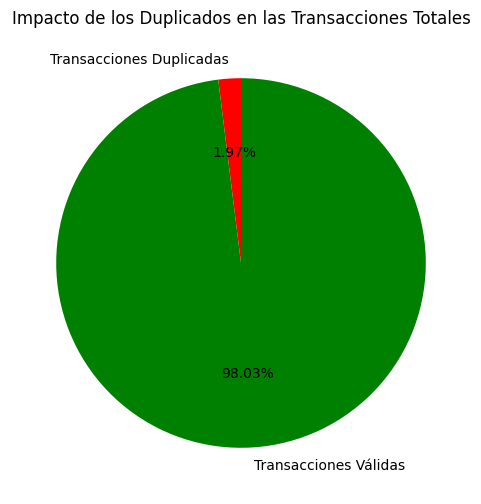

In [9]:

total_ventas = len(df)  

print(f"Total de ventas: {total_ventas}")
print(f"Total de transacciones duplicadas: {total_duplicados}")

# Crear gráfico de pastel mostrando el impacto de las transacciones duplicadas
plt.figure(figsize=(6,6))
plt.pie([total_duplicados, total_ventas - total_duplicados], 
        labels=["Transacciones Duplicadas", "Transacciones Válidas"], 
        autopct="%1.2f%%", 
        colors=['red', 'green'], 
        startangle=90)
plt.title("Impacto de los Duplicados en las Transacciones Totales")
plt.show()


In [10]:

df_duplicados = df[df.duplicated(subset=['TransactionID'], keep=False)]

# Contar duplicados por localidad
duplicados_por_localidad = df_duplicados.groupby('Location').size().reset_index(name='Cantidad Duplicados')

# Mostrar los resultados
print("Cantidad de transacciones duplicadas por localidad:")
print(duplicados_por_localidad)


Cantidad de transacciones duplicadas por localidad:
       Location  Cantidad Duplicados
0  Barranquilla                 3934
1        Bogotá                 3878
2          Cali                 3978
3     Cartagena                 3940
4      Medellín                 3946


In [11]:
# Eliminar duplicados
df_sin_duplicados = df.drop_duplicates(subset=['TransactionID'], keep='first')  

Buscamos las transacciones duplicadas y las contamos para evaluar su impacto en el DataFrame. Dado que el error es menor al 2%, eliminamos solo uno de los registros duplicados, manteniendo uno para minimizar su efecto en el análisis


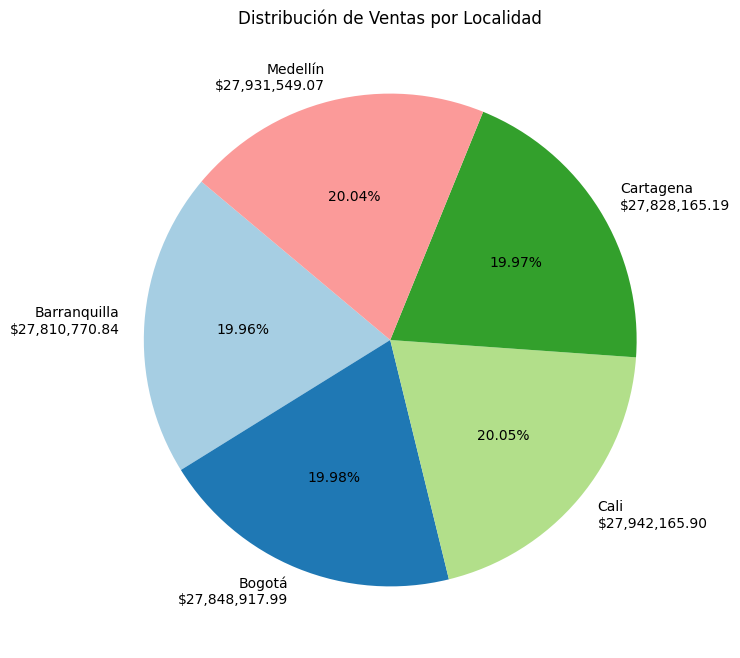

In [12]:
ventas_por_localidad = df_sin_duplicados.groupby('Location')['TotalSales'].sum().reset_index()

etiquetas = [f"{loc}\n${ventas:,.2f}" for loc, ventas in zip(ventas_por_localidad['Location'], ventas_por_localidad['TotalSales'])]

plt.figure(figsize=(8,8))
plt.pie(ventas_por_localidad['TotalSales'], 
        labels=etiquetas, 
        autopct="%1.2f%%", 
        colors=plt.cm.Paired.colors, 
        startangle=140)

# Título del gráfico
plt.title("Distribución de Ventas por Localidad")
plt.show()


En esta sección, realizamos una corrección entre el precio y la cantidad vendida para identificar posibles inconsistencias en el análisis, detectando valores que estén fuera del rango esperado.


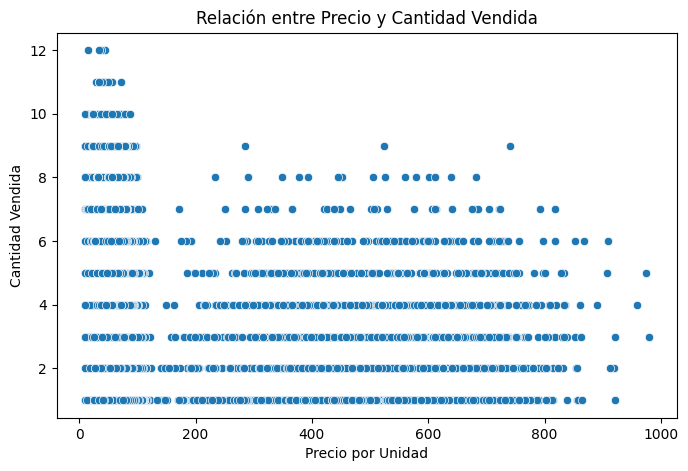

In [13]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df_sin_duplicados['PricePerUnit'], y=df_sin_duplicados['QuantitySold'])
plt.xlabel("Precio por Unidad")
plt.ylabel("Cantidad Vendida")
plt.title("Relación entre Precio y Cantidad Vendida")
plt.show()


Se corrigen los problemas en el dataset, incluyendo valores erróneos, duplicados e inconsistencias en el inventario.


In [14]:
df_sin_duplicados.head()

,TransactionID,Date,ProductCategory,Location,QuantitySold,PricePerUnit,TotalSales
0,343659ce-f3f9-4602-8300-ef6dd037018e,2025-01-01,Ropa,Cartagena,3,52.54,157.62
1,32321226-2d3c-4d4a-8d13-5767ba9fc659,2025-01-01,Ropa,Bogotá,2,48.18,96.36
2,75e25cc7-a4d8-429f-88e4-80fab90f7d9d,2025-01-01,Calzado,Cali,4,67.35,269.40
3,6facb6e4-a844-403c-a74e-cca6b6b4d44b,2025-01-01,Accesorios,Cartagena,6,53.00,318.00
4,0bf768e5-580f-43a1-a085-0c265a2b206c,2025-01-01,Accesorios,Barranquilla,2,62.97,125.94


In [15]:
df_sin_duplicados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 990162 entries, 0 to 999999
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   TransactionID    990162 non-null  object        
 1   Date             990162 non-null  datetime64[ns]
 2   ProductCategory  990162 non-null  object        
 3   Location         990162 non-null  object        
 4   QuantitySold     990162 non-null  int64         
 5   PricePerUnit     990162 non-null  float64       
 6   TotalSales       990162 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 60.4+ MB


In [16]:
df.describe()

,Date,QuantitySold,PricePerUnit,TotalSales
count,1000000,1000000.000000,1000000.000000,1000000.000000
mean,2025-01-01 00:00:01.900799488,2.753511,51.124773,140.744358
min,2025-01-01 00:00:00,1.000000,10.000000,10.000000
25%,2025-01-01 00:00:00,1.000000,39.910000,59.420000
50%,2025-01-01 00:00:00,2.000000,50.050000,115.470000
75%,2025-01-01 00:00:00,4.000000,60.200000,192.120000
max,2025-01-02 00:00:00,12.000000,979.200000,6666.300000
std,NaN,1.648096,27.801333,122.061880


In [ ]:
print(f"Duplicados: {df.duplicated().sum()}") 
print(f"Valores nulos:\n{df.isnull().sum()}")  


Duplicados: 0
Valores nulos:
TransactionID      0
Date               0
ProductCategory    0
Location           0
QuantitySold       0
PricePerUnit       0
TotalSales         0
dtype: int64
